#**Work Done :**
**Data Collection** : Gaurav Jain

**Data Cleaning** : Gaurav Jain

**EDA** : Gaurav Jain

**KNN Classifer with KFold Cross Validation** : Gaurav Jain

**Decision Tree Classifier with KFold Cross Validation**: Gaurav Jain


#**Gender Analysis in Video Games**

#Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Datasets/Gaming Info.csv')
df.head()

,Timestamp,Name,Age,Gender,Hours,Competitivenes,Consoles,Games_Played,Genre,Platform,Control,Community
0,5/8/2024 21:10,Manas,19,Male,12,low,0,2,Adventure,PC/Desktop,Touchscreen,Gaming Blogs
1,5/8/2024 21:10,A,19,Male,24,high,0,6,FPS,PC/Desktop,Keyboard and mouse,Discord servers
2,5/8/2024 21:11,AS,20,Male,25,high,2,8,Action,Mobile,Keyboard and mouse,Instagram groups
3,5/8/2024 21:12,Trishit Bhattacharjee,20,Male,2,medium,0,2,Adventure,Mobile,Touchscreen,Instagram groups
4,5/8/2024 21:13,BP,19,Male,8,medium,2,2,Story-based,Laptop,Keyboard and mouse,Discord servers


# Initial Data Inspection

In [ ]:
df.tail()

,Timestamp,Name,Age,Gender,Hours,Competitivenes,Consoles,Games_Played,Genre,Platform,Control,Community
255,5/18/2024 14:09,Sakshi,27,Female,8,medium,2,4,Puzzles,X Box,Controller,Discord servers
256,5/18/2024 14:09,Aarav,24,Male,1,high,0,1,Open World,Play Station,Keyboard and mouse,Forums
257,5/18/2024 14:10,Naina,27,Female,2,medium,1,6,Story-based,Mobile,Touchscreen,Instagram groups
258,5/18/2024 14:10,Arjun,20,Male,6,medium,2,2,Puzzles,Laptop,Keyboard and mouse,Gaming Blogs
259,5/18/2024 14:10,Lavanya,26,Female,7,high,0,2,Story-based,Play Station,Wireless remotes,Forums


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       260 non-null    object
 1   Name            260 non-null    object
 2   Age             260 non-null    int64 
 3   Gender          260 non-null    object
 4   Hours           260 non-null    int64 
 5   Competitivenes  260 non-null    object
 6   Consoles        260 non-null    int64 
 7   Games_Played    260 non-null    int64 
 8   Genre           260 non-null    object
 9   Platform        260 non-null    object
 10  Control         260 non-null    object
 11  Community       260 non-null    object
dtypes: int64(4), object(8)
memory usage: 24.5+ KB


# Data Cleaning


##**1. Check for Duplication**

In [ ]:
df.nunique()

Timestamp          94
Name              168
Age                16
Gender              2
Hours              36
Competitivenes      3
Consoles            7
Games_Played       12
Genre               9
Platform            6
Control             4
Community           5
dtype: int64

##**2. Missing Values Calculation**

In [ ]:
df.isnull().sum()

Timestamp         0
Name              0
Age               0
Gender            0
Hours             0
Competitivenes    0
Consoles          0
Games_Played      0
Genre             0
Platform          0
Control           0
Community         0
dtype: int64

##**3. Data Reduction**

In [ ]:
df = df.drop(columns=['Timestamp', 'Name'], axis=1)
df.head()

,Age,Gender,Hours,Competitivenes,Consoles,Games_Played,Genre,Platform,Control,Community
0,19,Male,12,low,0,2,Adventure,PC/Desktop,Touchscreen,Gaming Blogs
1,19,Male,24,high,0,6,FPS,PC/Desktop,Keyboard and mouse,Discord servers
2,20,Male,25,high,2,8,Action,Mobile,Keyboard and mouse,Instagram groups
3,20,Male,2,medium,0,2,Adventure,Mobile,Touchscreen,Instagram groups
4,19,Male,8,medium,2,2,Story-based,Laptop,Keyboard and mouse,Discord servers


In [ ]:
df.describe()

,Age,Hours,Consoles,Games_Played
count,260.000000,260.000000,260.000000,260.000000
mean,22.380769,12.815385,1.438462,4.465385
std,3.734067,9.594307,1.270417,2.696121
min,15.000000,0.000000,0.000000,0.000000
25%,20.000000,5.000000,0.000000,2.000000
50%,22.000000,10.000000,1.000000,4.000000
75%,25.000000,20.000000,2.000000,7.000000
max,30.000000,35.000000,10.000000,14.000000


**Observation** :

1. The average age of the respondants in the dataset is **22yrs** which shows majority of the respondants are from teenage.
2. On an average every respondant plays about **4 games**. However, there is difference between maximum and minimum number of games played.
3. **Consoles and Hours** are right skewed which means they contain some outliers.
4. Minimum number of **Consoles** is zero which is not possible. Hence, it is a data entry issue.  

##**4. EDA Univariate Analysis**

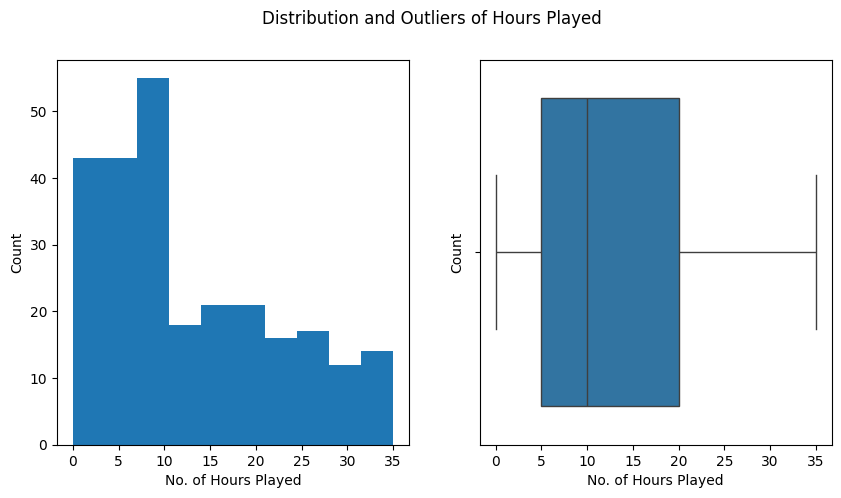

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Hours '].hist(grid=False)
plt.ylabel("Count")
plt.xlabel("No. of Hours Played")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Hours '])

plt.ylabel("Count")
plt.xlabel("No. of Hours Played")
plt.suptitle("Distribution and Outliers of Hours Played")
plt.show()

**Observation :** The majority of the respondants have **5 - 10 hours** of Game time per week

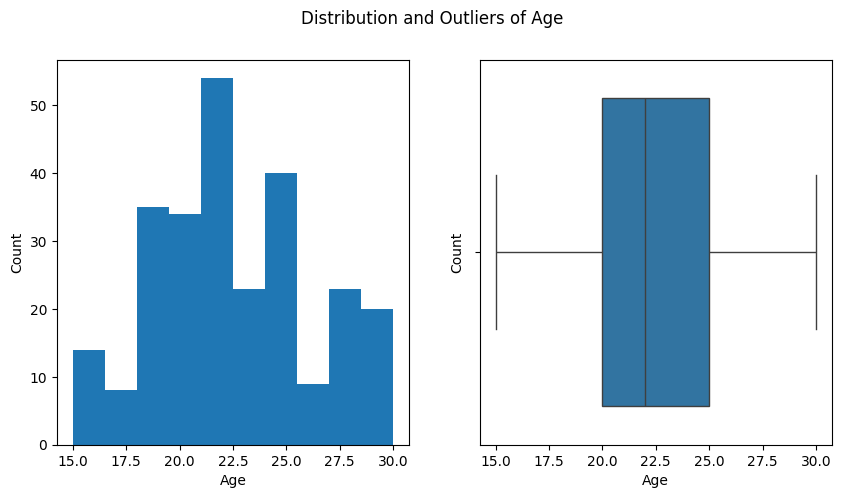

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Age'].hist(grid=False)
plt.ylabel("Count")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])

plt.ylabel("Count")
plt.xlabel("Age")
plt.suptitle("Distribution and Outliers of Age")
plt.show()

**Observation :** The respondants spans over **15 years** of age to **30 years** of age and the mean age is **22 yrs** with no outliers.

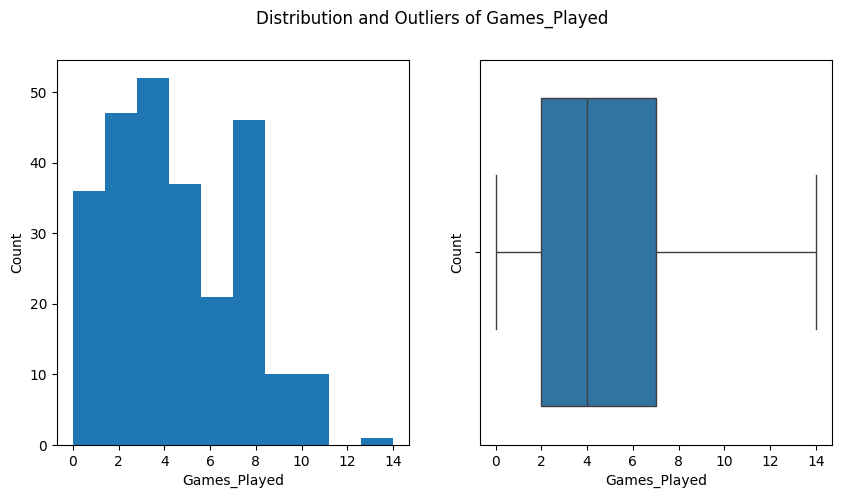

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Games_Played'].hist(grid=False)
plt.ylabel("Count")
plt.xlabel("Games_Played")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Games_Played'])

plt.ylabel("Count")
plt.xlabel("Games_Played")
plt.suptitle("Distribution and Outliers of Games_Played")
plt.show()

**Observation :** The majority respondants plays about **3 to 4 games** in total however there are few who plays about 13 to 14 games also.

##**5. Representation of Categorical Data (Multivariate Analysis)**

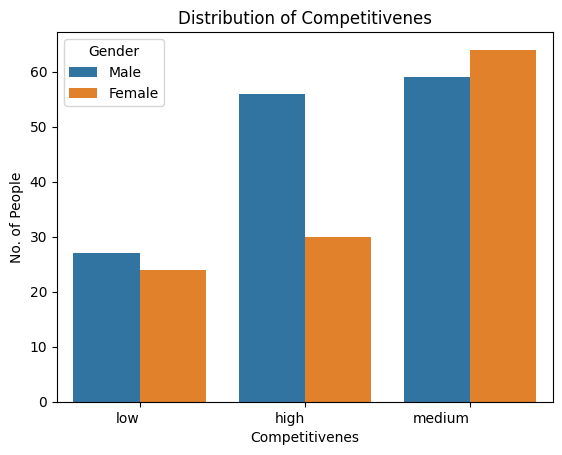

In [ ]:
sns.countplot(x='Competitivenes', data=df, hue='Gender')
plt.ylabel("No. of People")
plt.xlabel("Competitivenes")
plt.title("Distribution of Competitivenes")
plt.xticks(ha='right')
plt.show()

**Observation :** The majority respondants have **Medium competitiveness** about the games they play and it has almost **eqaul distribution** of the both the genders in it

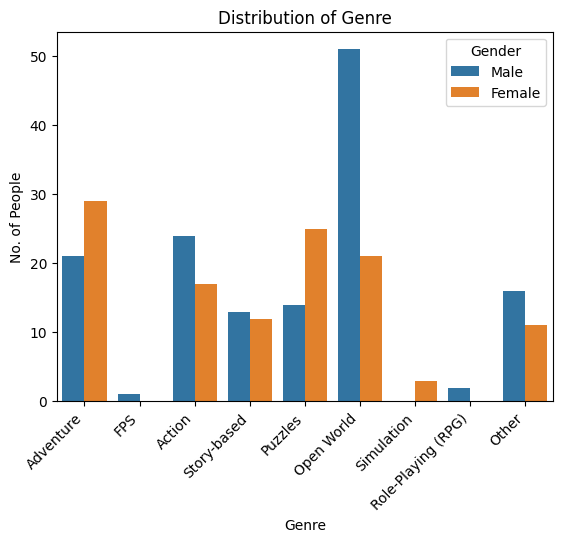

In [ ]:
sns.countplot(x='Genre', data=df, hue='Gender')
plt.ylabel("No. of People")
plt.xlabel("Genre")
plt.title("Distribution of Genre")
plt.xticks(rotation=45, ha='right')
plt.show()

**Observation** : **Open World** genre has highest number of Male players while **Adventure** has highest number of Female players. Also **FPS, Simulation and RPG** has only one gender playing game

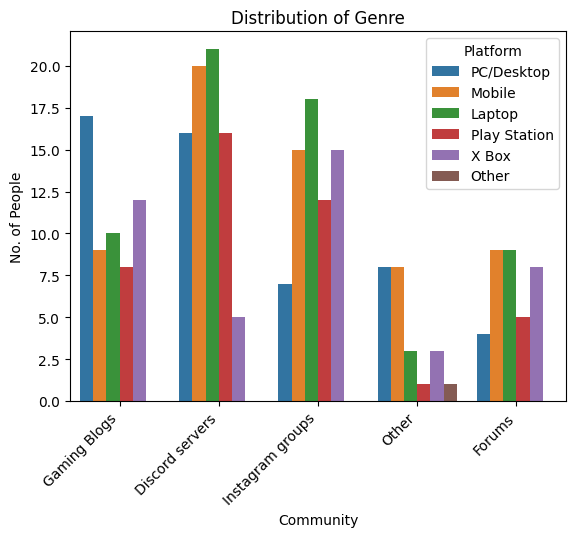

In [ ]:
sns.countplot(x='Community', data=df, hue='Platform')
plt.ylabel("No. of People")
plt.xlabel("Community")
plt.title("Distribution of Genre")
plt.xticks(rotation=45, ha='right')
plt.show()

**Observation** : **Discord Server** is most famous platform for the gamers for Community building in all types of Platforms and amonng the Plattforms **Laptop and Desktop** has highest number of gamers.

##**6. Encoding the Categorical Variables**

In [ ]:
gender = {"Male" : 0,  "Female" : 1}
genre = {"Open World" : 0, "Adventure" : 1, "Action" : 2, "Puzzles" : 3, "Other" : 4, "Story-based" : 5, "Simulation" : 6, "Role-Playing (RPG)" : 7, "FPS" : 8}
platform = {"Mobile" : 0, "Laptop": 1, "PC/Desktop" : 2, "X Box" : 3, "Play Station" : 4, "Other" : 5}
control = {"Keyboard and mouse" : 0, "Controller" : 1, "Touchscreen" : 2, "Wireless remotes" : 3}
community = {"Discord servers" : 0,  "Instagram groups" : 1, "Gaming Blogs" : 2, "Forums" : 3, "YouTube, twitch" : 4, "Other" : 5}
competitivenes = {"low" : 0, "medium" : 1, "high" : 2}

df['Genre'] = df['Genre'].replace(genre)
df['Gender'] = df['Gender'].replace(gender)
df['Platform'] = df['Platform'].replace(platform)
df['Control'] = df['Control'].replace(control)
df['Community'] = df['Community'].replace(community)
df['Competitivenes'] = df['Competitivenes'].replace(competitivenes)

#KNN(K-Nearest Neighbour) Classification Algorithm
1.Select the K value.

2.Calculate the Euclidean distance from K value to Data points.

3.Take the K nearest neighbors as per the calculated Euclidean distance.

4.Among these k neighbors, count the number of the data points in each category.

5.Classify the new data points to that category for which the number of the neighbor is maximum.

## Spliting the dataset into Dependent and Independent Variables

In [ ]:
X = df.drop("Gender", axis=1)
y = df['Gender']

## Split the value to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

## Implementing KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

##**Performing K Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state=42, shuffle=True)

cv_scores = []
best_split_index = None
best_split_score = 0.0

for split_index, (train_index, val_index) in enumerate(kf.split(X), 1):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)

    val_score = knn.score(X_val_kf, y_val_kf)
    cv_scores.append(val_score)

    if val_score > best_split_score:
      best_split_score = val_score
      best_split_index = split_index

print(f"Best split: Split {best_split_index}, Accuracy: {best_split_score}")

Best split: Split 7, Accuracy: 0.7307692307692307


## Training the Model from Best Split

In [ ]:
best_train_index, best_val_index = list(kf.split(X))[best_split_index - 1]

X_train_best, X_val_best = X.iloc[best_train_index], X.iloc[best_val_index]
y_train_best, y_val_best = y.iloc[best_train_index], y.iloc[best_val_index]

## Predicting the Test Set Results

In [ ]:
knn.fit(X_train_best, y_train_best)
y_pred = knn.predict(X_val_best)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1]


## Confusion Matrix

Accuracy Score :  0.7307692307692307


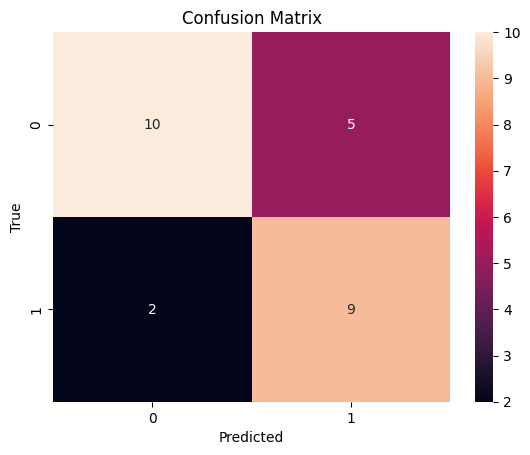

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val_best, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print("Accuracy Score : ", accuracy_score(y_val_best, y_pred))

**Observation** :
1. The Accuracy of the model is **73%** withh KNN CLassification.
2. Out of **26 responses** in the Test Dataset the following were results:
2. **19** values were predicted **correctly** in terms of their Gender.
3. **7** values were **not predicted correctly** in terms of their Gender.
4. We can conclude that there are **more** number of **Males** who play Video Games as comapred to that of Females.

# **Decision Tree Algorithm**

##Implementing the Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

##**Performing K Fold Classification**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state=42, shuffle=True)

cv_scores = []
best_split_index = None
best_split_score = 0.0

for split_index, (train_index, val_index) in enumerate(kf.split(X), 1):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    dt.fit(X_train_kf, y_train_kf)

    val_score = dt.score(X_val_kf, y_val_kf)
    cv_scores.append(val_score)

    if val_score > best_split_score:
      best_split_score = val_score
      best_split_index = split_index

print(f"Best split: Split {best_split_index}, Accuracy: {best_split_score}")

Best split: Split 3, Accuracy: 0.6538461538461539


## Training the Decision Tree Classification model on the Training set (Gini - Index)

In [ ]:
best_train_index, best_val_index = list(kf.split(X))[best_split_index - 1]

dt_X_train_best, dt_X_val_best = X.iloc[best_train_index], X.iloc[best_val_index]
dt_y_train_best, dt_y_val_best = y.iloc[best_train_index], y.iloc[best_val_index]

## Predicting the Test set results

In [ ]:
predicted = dt.predict(dt_X_val_best)

## Making the Confusion Matrix

Accuracy Score of Decision Tree with Gini Index :  1.0


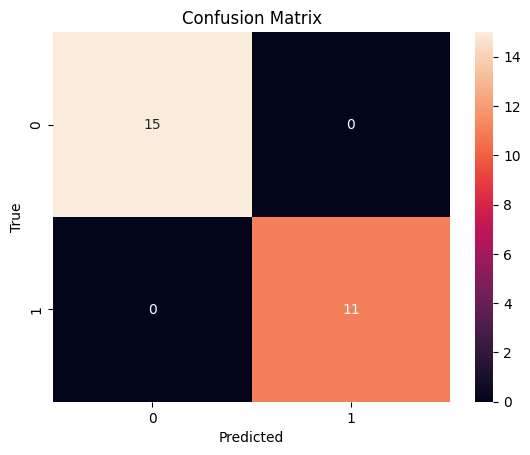

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(dt_y_val_best, predicted)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print("Accuracy Score of Decision Tree with Gini Index : ", accuracy_score(dt_y_val_best, predicted))

## Visualizing the Decision Tree

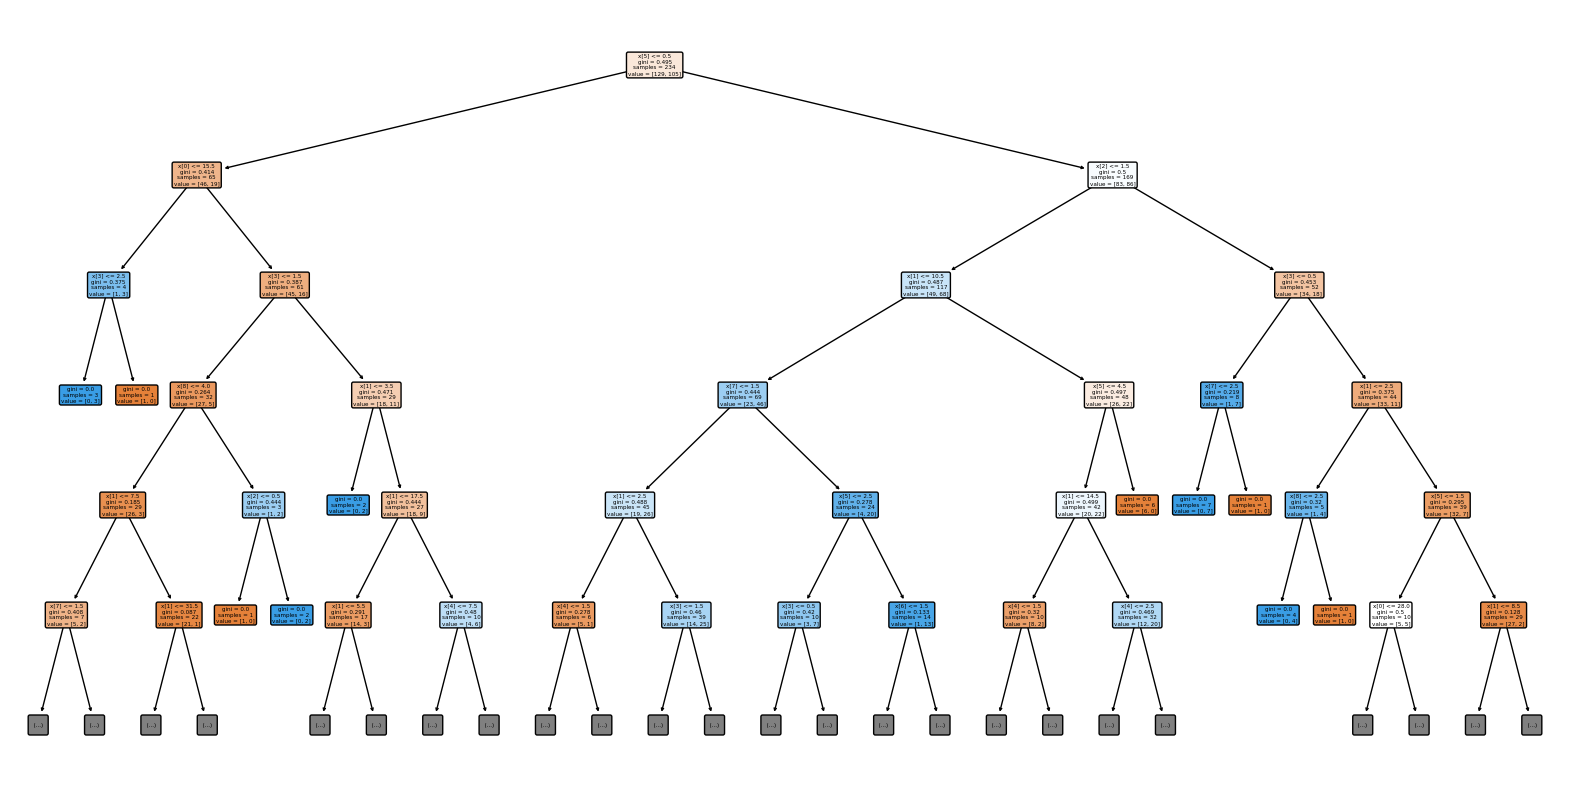

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, rounded=True, max_depth=5)
plt.show()

**Observation** :

1. We got our **First Pure Subset** at 3rd level of Decision Tree.
2. It shows that those Gamers who use **TouchScreen** and have more than **2 consoles** for playing games are **Males** and those who have **less than 2 consoles** are **Females**.
3. In Total we have **10 Pure Subsets** within 5th level of Decision Tree.
4. The Decision Tree consisit of exactly **7 Factors or attributes** in total.